In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/computacional"

'Copia de Chi2Fitting.ipynb'		  Datos3.root
'Copia de Copia de BasicAnalysis.ipynb'   Datos4.root
'Copia de N1152706893.root'		  Datos5.root
'Copia de Reto2 (1).ipynb'		  Datos6.root
'Copia de root_build_google_yikes.tar'	  MonteCarlo.ipynb
'Copia de TrimmedTree.root'		  Parcial2L.ipynb
 Datos1.root				  Tarea3.ipynb
 Datos2.root


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 18 00:59 drive


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT 
import numpy as np
from random import random 
import matplotlib.pyplot as plt

In [0]:
DataChain=ROOT.TChain("SystemTree") 
DataChain.Add("/content/drive/My Drive/computacional/Copia de N1152706893.root")

1

In [0]:
NumberOfEventsToCheck=DataChain.GetEntries() 
print("We are going to analyze ",NumberOfEventsToCheck, " events")


We are going to analyze  85000  events


<ROOT.TH1F object ("Hist") at 0x7eb2800>


Warning in <TROOT::Append>: Replacing existing TH1: Hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


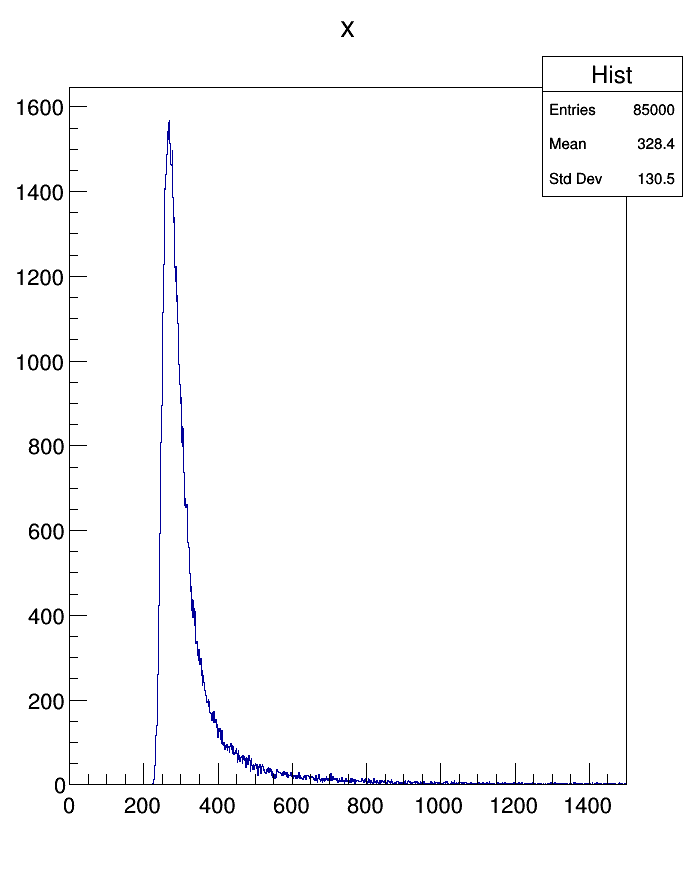

In [0]:
#Punto 1: Histograma de la variable "x"
Hist= ROOT.TH1F( 'Hist', 'x', 1000, 0 , 1500 )
for entry in DataChain:
  var=entry.x
  Hist.Fill(var)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()
print(Hist)

In [0]:
#Punto 2: Algoritmo de Metrópolis para el cual usamos ROOT.Math.Landau ya que con el método "integrate" la función, se hacía largo el tiempo de ejecución
N=85000
X1=[]
X2=[]
a=220
b=1500

x01=(b-a)*random()+a 
x02=(b-a)*random()+a
X1.append(x01)
X2.append(x02)
Mu=328.4
cu=130.5

In [0]:
while ((len(X1)+len(X2))<N):

    xp1=(b-a)*random()+a
    deltas1=-np.log(ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True))

    xp2=(b-a)*random()+a
    deltas2=-np.log(ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True))

    if deltas1<0 and deltas2<0:
      xu1=xp1
      X1.append(xu1)
      if ((len(X1)+len(X2))>=N):
          break
      xu2=xp2
      X2.append(xu2)

    if deltas1<0 and deltas2>0:
      xu1=xp1
      X1.append(xu1)
      if ((len(X1)+len(X2))>=N):
          break
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)

    if deltas1>0 and deltas2<0:
      xu2=xp2
      X2.append(xu2)
      if ((len(X1)+len(X2))>=N):
          break
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)
        
    if deltas1>0 and deltas2>0:
      r1=random()
      Pron1=ROOT.TMath.Landau(xp1,Mu,cu,True)/ROOT.TMath.Landau(X1[-1],Mu,cu,True)
      r2=random()
      Pron2=ROOT.TMath.Landau(xp2,Mu,cu,True)/ROOT.TMath.Landau(X2[-1],Mu,cu,True)
      if r2<Pron2:
        xu2=xp2
        X2.append(xu2)
        if ((len(X1)+len(X2))>=N):
          break
      if r1<Pron1:
        xu1=xp1
        X1.append(xu1)

85000
85000


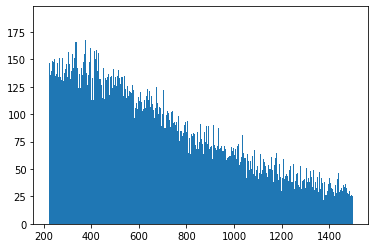

Warning in <TROOT::Append>: Replacing existing TH1: Hist2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


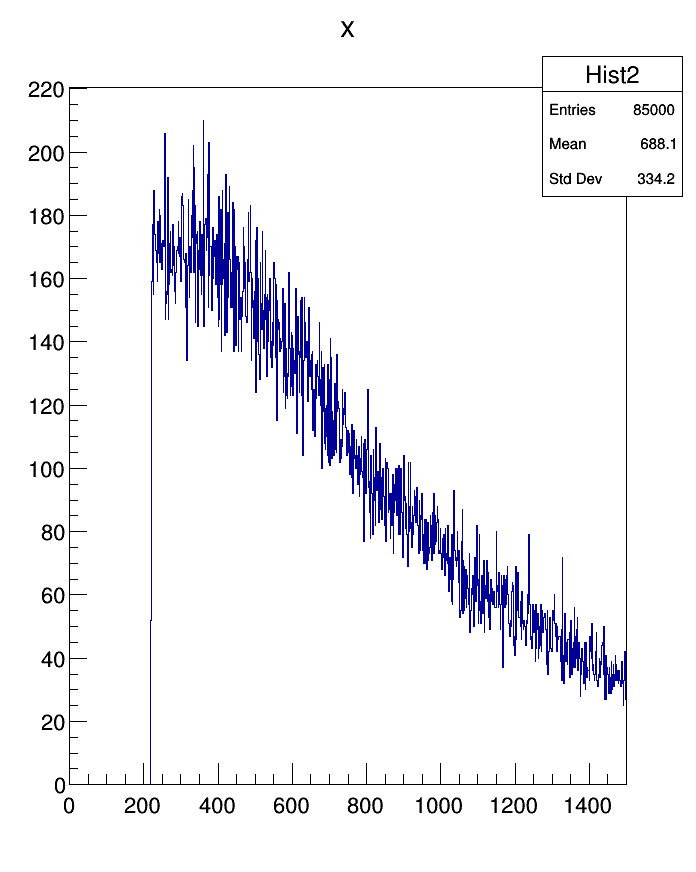

In [0]:
#Su histograma generado es:
print(len(X1)+len(X2))

X=X1+X2 
print(len(X))
plt.hist(X,bins=500)
plt.show()
Hist2= ROOT.TH1F( 'Hist2', 'x', 1000, 0 , 1500 )
for i in X:
  Hist2.Fill(i)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist2.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [105]:
#Punto 3: 
#Generemos primero diferentes valores de mu y c
N=85000 
ALLX=[] 
ALLY=[] #En este veré los valores de MU y C
a=220
b=1500

MU=np.linspace(290,340,8) #Le puse 8 porque si le ponía más se me demoraba mucho
C=np.linspace(10,20,8)
print(MU)
print(C)

[290.         297.14285714 304.28571429 311.42857143 318.57142857
 325.71428571 332.85714286 340.        ]
[10.         11.42857143 12.85714286 14.28571429 15.71428571 17.14285714
 18.57142857 20.        ]


In [106]:
#Aplicamos ahora metrópolis pero variando el mu y c

for j in MU:
  for k in C:
    X1=[]
    X2=[]
    x01=(b-a)*random()+a
    x02=(b-a)*random()+a
    X1.append(x01)
    X2.append(x02)
    while ((len(X1)+len(X2))<N):
      xp1=(b-a)*random()+a
      deltas1=-np.log(ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True))

      xp2=(b-a)*random()+a
      deltas2=-np.log(ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True))

      if deltas1<0 and deltas2<0:
        xu1=xp1
        X1.append(xu1)
        if ((len(X1)+len(X2))>=N):
          break
        xu2=xp2
        X2.append(xu2)
      if deltas1<0 and deltas2>0:
        xu1=xp1
        X1.append(xu1)
        if ((len(X1)+len(X2))>=N):
          break
        r2=random()
        Pron2=ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True)
        if r2<Pron2:
          xu2=xp2
          X2.append(xu2)
      if deltas1>0 and deltas2<0:
        xu2=xp2
        X2.append(xu2)
        if ((len(X1)+len(X2))>=N):
          break
        r1=random()
        Pron1=ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True)
        if r1<Pron1:
          xu1=xp1
          X1.append(xu1)
      if deltas1>0 and deltas2>0:
        r1=random()
        Pron1=ROOT.TMath.Landau(xp1,j,k,True)/ROOT.TMath.Landau(X1[-1],j,k,True)
        r2=random()
        Pron2=ROOT.TMath.Landau(xp2,j,k,True)/ROOT.TMath.Landau(X2[-1],j,k,True)
        if r2<Pron2:
          xu2=xp2
          X2.append(xu2)
          if ((len(X1)+len(X2))>=N):
            break
        if r1<Pron1:
          xu1=xp1
          X1.append(xu1)
    X=X1+X2

    ALLX.append(X)
    ALLY.append([j,k])
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [107]:
print(len(ALLX))
print(len(ALLX[2]))


64
85000


In [108]:
#Para el chi-cuadrado:
Bin=Hist.GetNbinsX()+1
print(Bin)
FullChi2 = [] 
for l in range(len(ALLX)):
  chi2=0.0 
  for z in range(Bin): 
    if Hist.GetBinContent(z)!=0: #Es para no dividir por cero
      chi2+=((Hist.GetBinContent(z)-ALLX[l][z])**2)/Hist.GetBinContent(z) #chi^2=sum[(dato(i)-metropolis(i))^2/dato(i)] 
  chi2ndf=chi2/Bin 
  FullChi2.append(chi2ndf)
print(FullChi2)
print(len(FullChi2))

1001
[50358.997275131995, 53378.902778799646, 57509.23950836285, 60482.594247114655, 52791.095722119986, 45224.5715726061, 56146.63742104184, 66165.71542793485, 60727.23681817196, 58248.18139177852, 66569.83127439058, 58034.634084249024, 65165.69520455184, 60370.41673161836, 58613.91903425762, 60864.64481682223, 57863.49858967433, 59966.718376000936, 75160.78625721844, 54458.46105369032, 59513.507940651565, 58742.45526655948, 61155.417962598556, 70039.2600184414, 45153.28759804033, 57627.860404969084, 50427.56692581787, 56945.6326809867, 70782.96402393967, 76725.25910486506, 62160.0557381591, 74150.66594852495, 60413.83338448487, 60111.870714978075, 72035.99948014406, 60170.54360151189, 58249.9726769765, 71358.40194807503, 69103.14945201931, 55570.29785727135, 54905.29887596718, 65927.81522411603, 55311.06080691941, 59621.88579243507, 74730.21186115064, 78258.63916437628, 65047.52303033972, 65464.44611883843, 66464.64507457777, 64356.405491589074, 70291.66460015089, 60387.63339597836, 

In [109]:
#Necesito saber el valor mínimo del Chi-cuadrado y para ello miro la posición del valor mínimo para saber que iteración es la que se hizo y poder ver a que mu y c corresponde
mini=min(FullChi2)
pos=FullChi2.index(mini)
print("minimo de chi^2:",mini)
print("posicion",pos) 

minimo de chi^2: 45153.28759804033
posicion 24


In [110]:
#Valores de Mu y C

ALLY[40]

[325.7142857142857, 10.0]

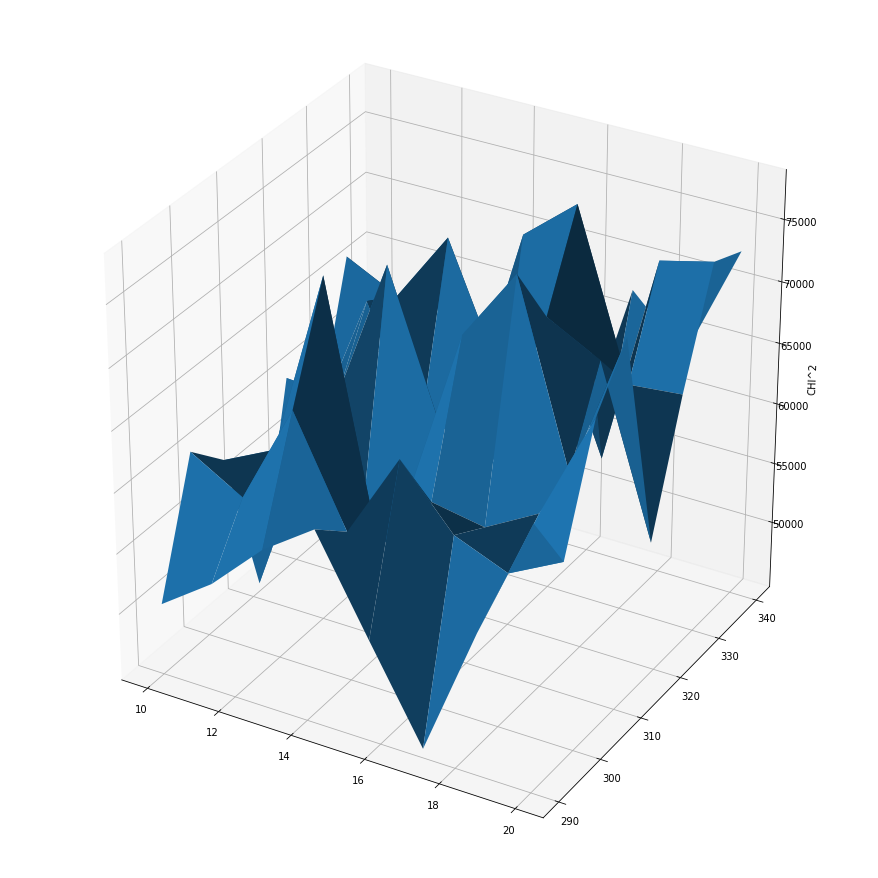

In [111]:
#Gráfica CHI^2
FullChi2=np.array(FullChi2)
FullChi2=np.reshape(FullChi2,(8,8))
from pylab import*
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
Q, T = np.meshgrid(C, MU)

ax.plot_surface(Q, T, FullChi2, rstride=1, cstride=1)
ax.set_zlabel('CHI^2')
show()

42690
42310
85000


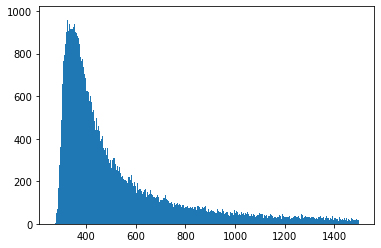

Warning in <TROOT::Append>: Replacing existing TH1: Hist3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


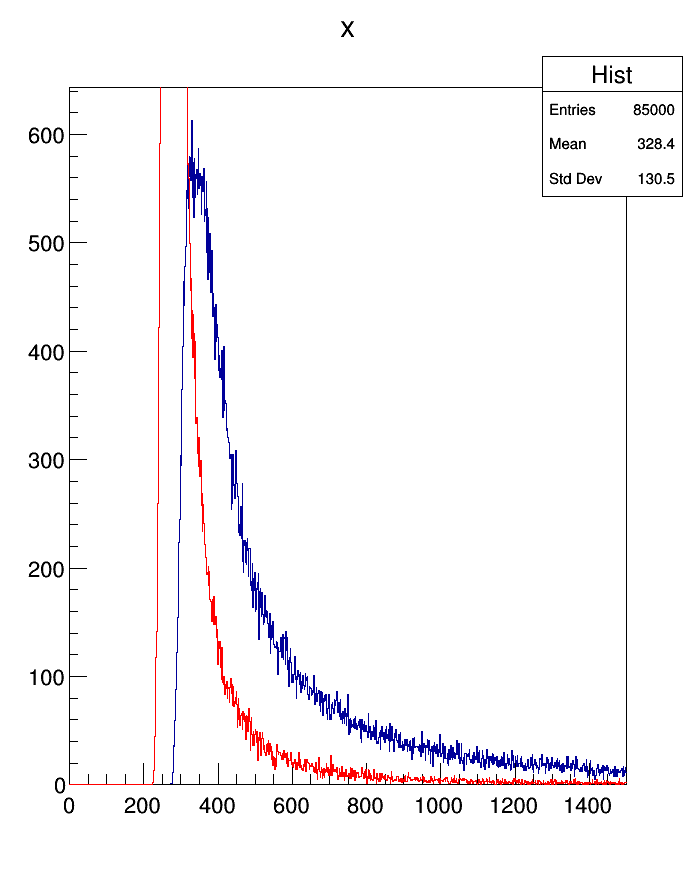

In [112]:
#Superposición de histogramas
#Color rojo: Muestra generada
#Color azul: Datos

print(len(X1))
print(len(X2))

X=X1+X2 
print(len(X))
plt.hist(X,bins=500)
plt.show()
Hist3= ROOT.TH1F( 'Hist3', 'x', 1000, 0 , 1500 )
for i in X:
  Hist3.Fill(i)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Hist3.Draw()
Hist.Draw('same')
Hist.SetLineColor(2)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

#En esta gráfica vemos que como da tan distante los dos histrogramas, tocaría aumentar un poco el valor de c generado para bajar el pico y disminuir el de mu para que se acerquen mas

In [0]:
#El chi^2 se define como chi^2=sum[(dato(i)-metropolis(i))^2/dato(i)]
#Es decir, mientras más cercano sea su valor a 0, más se acercan los valores de metrópolis a los datos, por tanto, menor es su "error"